<h1>Example microSWIFT kinematics data</h1>

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import cmocean
import cftime 
from scipy import signal
import datetime
%matplotlib widget

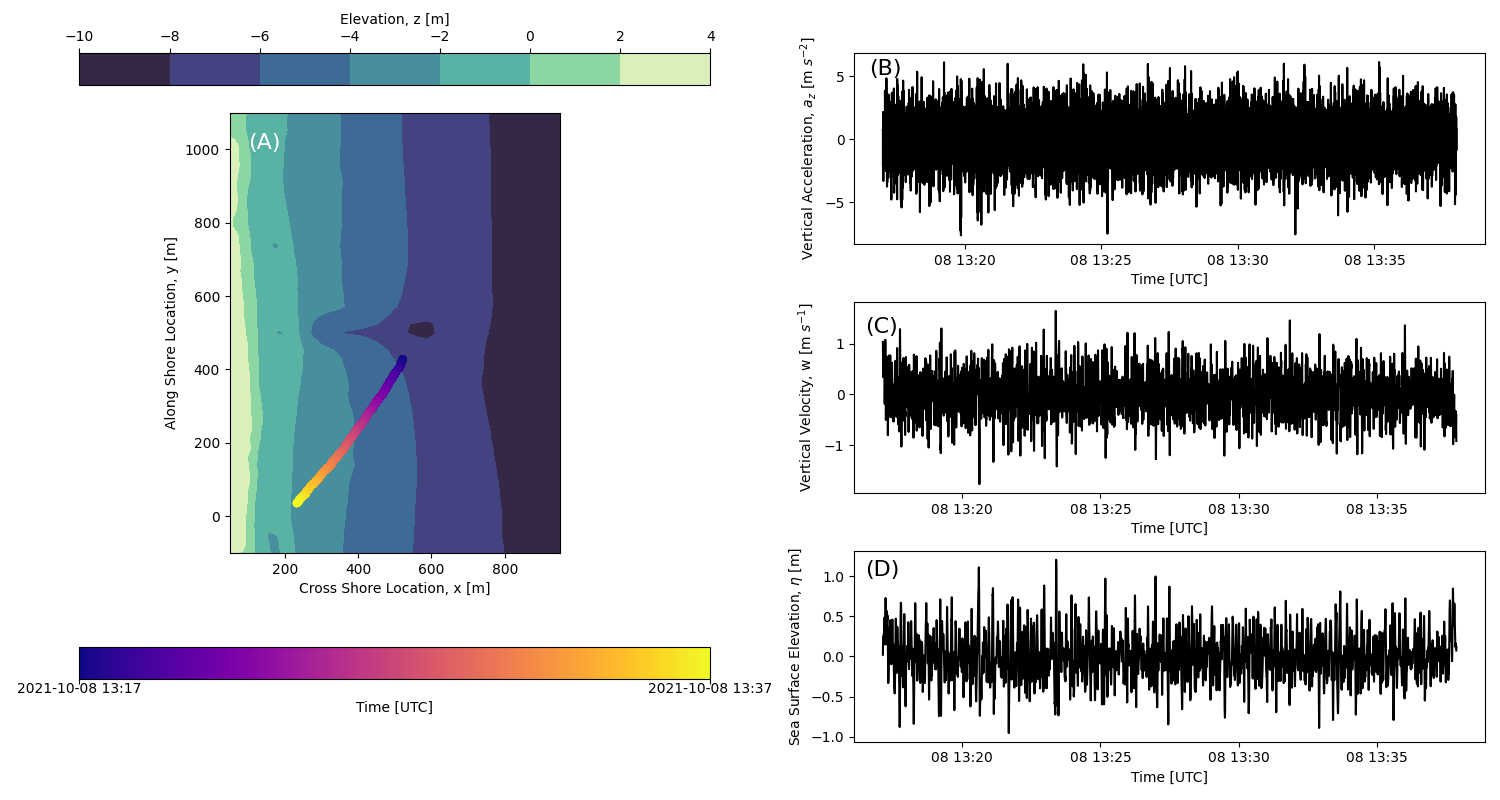

In [57]:
# Load in netCDF file as a dataset
mission_nc = '../microSWIFT_data/cleanedDataset/mission_15.nc'
mission_dataset = nc.Dataset(mission_nc, mode='r')
microSWIFT = 'microSWIFT_41'

# Define time values 
time = cftime.num2pydate(mission_dataset['time'], units=mission_dataset['time'].units, calendar=mission_dataset['time'].calendar)

# Plot the microSWIFT track and Data
fig = plt.figure()
fig.set_size_inches(15, 8)
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel('Cross Shore Location, x [m]')
ax1.set_ylabel('Along Shore Location, y [m]')

# Add the FRF Bathymetry to the map 
# Data from September 28th, 2021
# bathy_url = 'https://chlthredds.erdc.dren.mil/thredds/dodsC/frf/geomorphology/DEMs/surveyDEM/data/FRF_geomorphology_DEMs_surveyDEM_20210928.nc'
bathy_file = '../microSWIFT_data/FRFdata/FRF_geomorphology_DEMs_surveyDEM_20211021.nc'
bathy_dataset = nc.Dataset(bathy_file)
# Create grid from coordinates
xFRF_grid, yFRF_grid = np.meshgrid(bathy_dataset['xFRF'][:],bathy_dataset['yFRF'][:])
bathy = bathy_dataset['elevation'][0,:,:]
im = ax1.contourf(xFRF_grid, yFRF_grid, bathy, cmap=cmocean.cm.deep_r)
cbar_bathy = fig.colorbar(im, fraction=0.046, pad=0.04, location='top', orientation='horizontal')
cbar_bathy.ax.set_xlabel('Elevation, z [m]')

# Plot the microSWIFT drift track on bathymetry
x = mission_dataset[microSWIFT]['xFRF'][:]
y = mission_dataset[microSWIFT]['yFRF'][:]
map = ax1.scatter(x, y, c=mission_dataset['time'][:], s=20, cmap='plasma')
min_time_label = mission_dataset['time'][0]
max_time_label = mission_dataset['time'][-1]
time_labels = cftime.num2pydate([min_time_label, max_time_label],units=mission_dataset['time'].units, calendar=mission_dataset['time'].calendar)
cbar = fig.colorbar(map, ax=ax1, ticks=[min_time_label, max_time_label], orientation='horizontal')
map.set_clim([min_time_label, max_time_label])
cbar.ax.set_xlabel('Time [UTC]')
time_labels = [time_labels[0].strftime('%Y-%m-%d %H:%M'), time_labels[1].strftime('%Y-%m-%d %H:%M')]
cbar.ax.set_xticklabels(time_labels, rotation=0, va='center')
ax1.annotate('(A)', (100,1000), color='w', fontsize=16)

# Plot the accelerations - Earth Frame
ax2 = fig.add_subplot(3,2,2)
ax2.plot(time, signal.detrend(mission_dataset[microSWIFT]['accel_z'][:]), color='k')
ax2.set_xlabel('Time [UTC]')
ax2.set_ylabel('Vertical Acceleration, $a_z$ [m $s^{-2}$]')
ax2.annotate('(B)', (time[0]-datetime.timedelta(seconds=30),5.1), color='k', fontsize=16)

# Plot Velocities - Earth Frame
ax3 = fig.add_subplot(3,2,4)
ax3.plot(time, mission_dataset[microSWIFT]['w'][:], color='k')
ax3.set_xlabel('Time [UTC]')
ax3.set_ylabel('Vertical Velocity, w [m $s^{-1}$]')
ax3.annotate('(C)', (time[0]-datetime.timedelta(seconds=30),1.2), color='k', fontsize=16)

# Plot Positions - Earth Frame
ax4 = fig.add_subplot(3,2,6)
ax4.plot(time, mission_dataset[microSWIFT]['eta'][:], color='k')
ax4.set_xlabel('Time [UTC]')
ax4.set_ylabel('Sea Surface Elevation, $\eta$ [m]')
ax4.annotate('(D)', (time[0]-datetime.timedelta(seconds=30),1), color='k', fontsize=16)

# Figure Properties 
fig.tight_layout()
ax1.set_aspect('equal')
fig.savefig('./examplemicroSWIFTData.png')

# Close the dataset
mission_dataset.close()
